# **BACS2003 Artificial Intelligence**

### Segmentation of Music Streaming Users

## Group Members


| Name | Student ID |
| --- | --- |
| LAU AIK HUNG | 23WMR14555 |
| KESHANDRA A/L JAYASELAN | 23WMR14549 |
| LEONG CHUN XIANG | 23WMR15624 |


## Dataset

In [1]:
!pip install datasets


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

from IPython.display import display

# Load the Amazon products dataset
df = pd.read_csv('music_users.csv') 

# Display as a clean table 
display(df)

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,Female,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,Male,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,Male,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,Male,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,Male,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Male,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,Female,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,Female,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,Female,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


## Data Analysis

### Data Transformation, Data Preparation

In [4]:
# Check the column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')


In [5]:
# Check missing values
print(df.isnull().sum())

UserID                  0
Gender                  0
Age                     0
FavoriteMusicType       0
WeeklyListeningHours    0
PaidSubscription        0
ListeningPlatform       0
Country                 0
SubscriptionType        0
GenrePreferenceLevel    0
DeviceType              0
ListeningTimeOfDay      0
NumberOfPlaylists       0
dtype: int64


In [6]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Age                   10000 non-null  int64 
 3   FavoriteMusicType     10000 non-null  object
 4   WeeklyListeningHours  10000 non-null  int64 
 5   PaidSubscription      10000 non-null  object
 6   ListeningPlatform     10000 non-null  object
 7   Country               10000 non-null  object
 8   SubscriptionType      10000 non-null  object
 9   GenrePreferenceLevel  10000 non-null  object
 10  DeviceType            10000 non-null  object
 11  ListeningTimeOfDay    10000 non-null  object
 12  NumberOfPlaylists     10000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB
None


#### Change Gender to 1: Male 2: Female

In [7]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace music genres with corresponding numeric values

In [8]:
# Replace music genres with corresponding numeric values
df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({
    'Rock': 1,
    'Pop': 2,
    'J-Pop': 3,
    'K-Pop': 4,
    'EDM': 5,
    'Jazz': 6,
    'Chill': 7,
    'Oldies': 8,
    'Traditional': 9
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\1985122484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Change PaidSubscription to 1:Yes 2:No

In [9]:
# Replace PaidSubscription values: 'Yes' -> 1, 'No' -> 2
df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\1531532316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace ListeningPlatform values with numeric values

In [10]:
# Replace ListeningPlatform values with numeric values
df['ListeningPlatform'] = df['ListeningPlatform'].replace({
    'Spotify': 1,
    'Apple Music': 2,
    'QQ Music': 3,
    'NetEase Cloud': 4,
    'YouTube Music': 5,
    'Amazon Music': 6
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\1675106517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningPlatform'] = df['ListeningPlatform'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,France,Free,Medium,PC,Afternoon,76


#### Replace Country values with numeric values

In [11]:
# Replace Country values with numeric values
df['Country'] = df['Country'].replace({
    'China': 1,
    'USA': 2,
    'Japan': 3,
    'Korea': 4,
    'UK': 5,
    'Germany': 6,
    'France': 7,
    'Brazil': 8,
    'India': 9,
    'Australia': 10
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\2372742991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,Free,Medium,PC,Afternoon,76


#### Replace SubscriptionType values with numeric values

In [12]:
# Replace SubscriptionType values with numeric values
df['SubscriptionType'] = df['SubscriptionType'].replace({
    'Free': 1,
    'Premium': 2,
    'Family': 3,
    'Student': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\192492915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SubscriptionType'] = df['SubscriptionType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,Medium,PC,Afternoon,76


#### Replace GenrePreferenceLevel values with numeric values

In [13]:
# Replace GenrePreferenceLevel values with numeric values
df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({
    'High': 1,
    'Medium': 2,
    'Low': 3
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\3488713849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,3,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,PC,Afternoon,76


#### Replace DeviceType values with numeric values

In [14]:
# Replace DeviceType values with numeric values
df['DeviceType'] = df['DeviceType'].replace({
    'Mobile': 1,
    'PC': 2,
    'Tablet': 3,
    'Smart Speaker': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\1773138368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceType'] = df['DeviceType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,2,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,1,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,4,Morning,38
4,5,1,21,2,23,1,3,4,4,3,1,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,3,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,3,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,2,Afternoon,76


#### Replace ListeningTimeOfDay values with numeric values

In [15]:
# Replace ListeningTimeOfDay values with numeric values
df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_31252\1792907625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,2,62
1,2,1,34,9,16,2,2,2,3,1,2,2,19
2,3,1,32,7,15,1,4,3,2,2,1,2,48
3,4,1,41,6,16,2,2,5,4,2,4,1,38
4,5,1,21,2,23,1,3,4,4,3,1,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,2,12
9996,9997,2,35,8,17,1,2,2,1,1,3,4,26
9997,9998,2,28,9,5,2,2,2,4,3,3,2,26
9998,9999,2,25,4,13,2,4,7,1,2,2,2,76


In [16]:
df = df.drop(['UserID'], axis=1)

# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                10000 non-null  int64
 1   Age                   10000 non-null  int64
 2   FavoriteMusicType     10000 non-null  int64
 3   WeeklyListeningHours  10000 non-null  int64
 4   PaidSubscription      10000 non-null  int64
 5   ListeningPlatform     10000 non-null  int64
 6   Country               10000 non-null  int64
 7   SubscriptionType      10000 non-null  int64
 8   GenrePreferenceLevel  10000 non-null  int64
 9   DeviceType            10000 non-null  int64
 10  ListeningTimeOfDay    10000 non-null  int64
 11  NumberOfPlaylists     10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB
None


In [17]:
df.shape

(10000, 12)

In [18]:
df.columns

Index(['Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')

## Data Visualization

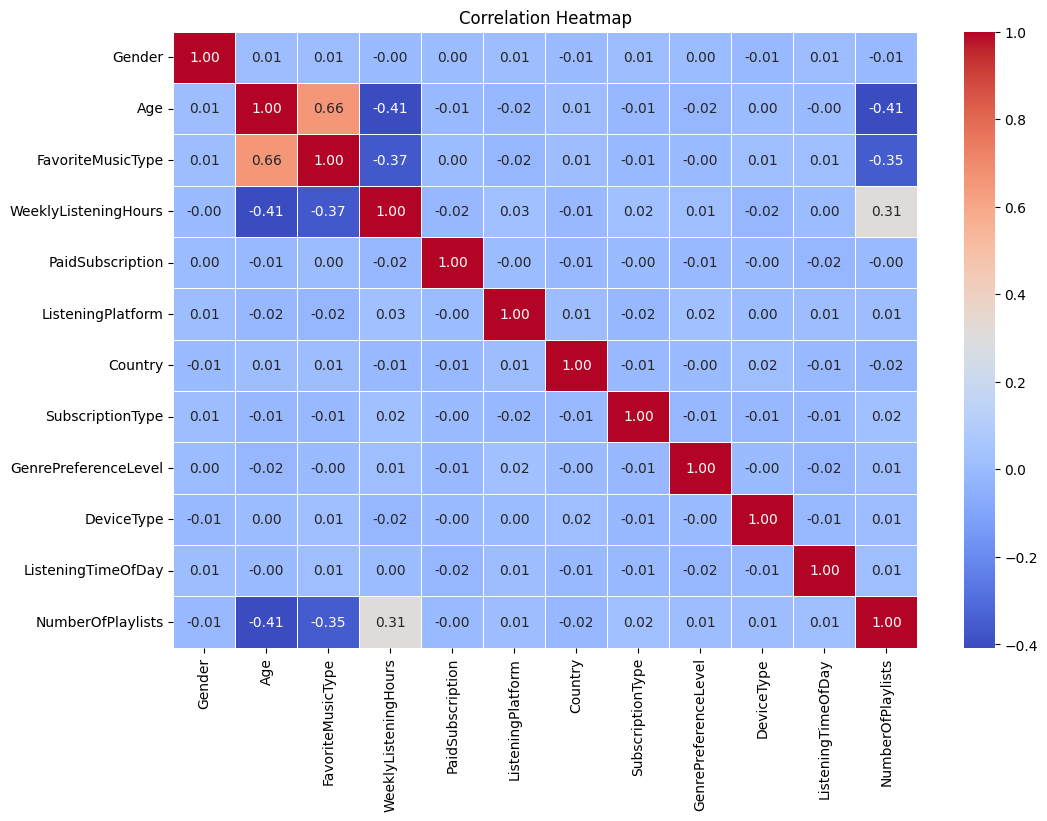

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
features = df[['Age', 'NumberOfPlaylists', 'WeeklyListeningHours','FavoriteMusicType']]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

### Pairplot (for a subset of features)

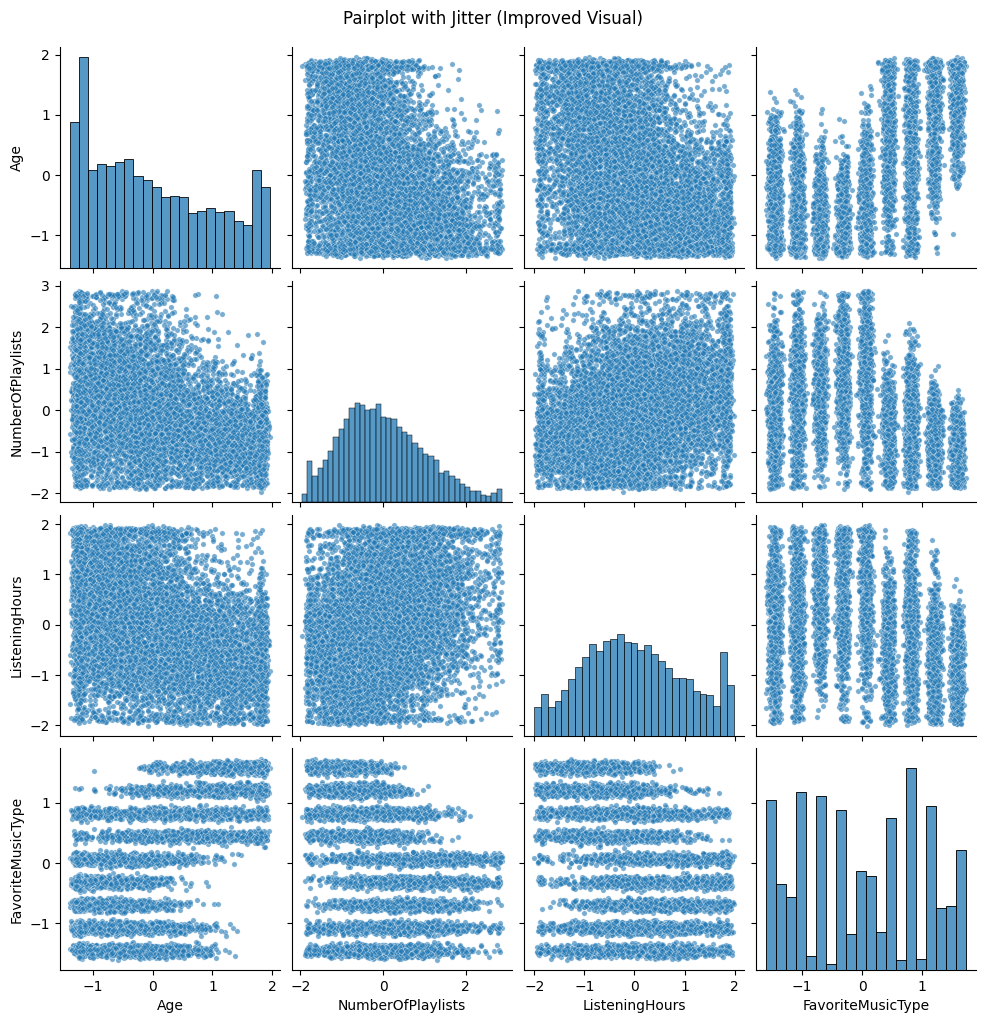

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(scaled_df), columns=['Age', 'NumberOfPlaylists', 'ListeningHours', 'FavoriteMusicType'])

jittered_data = data_scaled + np.random.normal(0, 0.05, data_scaled.shape)

sns.pairplot(jittered_data, plot_kws={'s': 15, 'alpha': 0.6})
plt.suptitle("Pairplot with Jitter (Improved Visual)", y=1.02)
plt.show()

### Heatmap of Correlation (on Scaled Data)

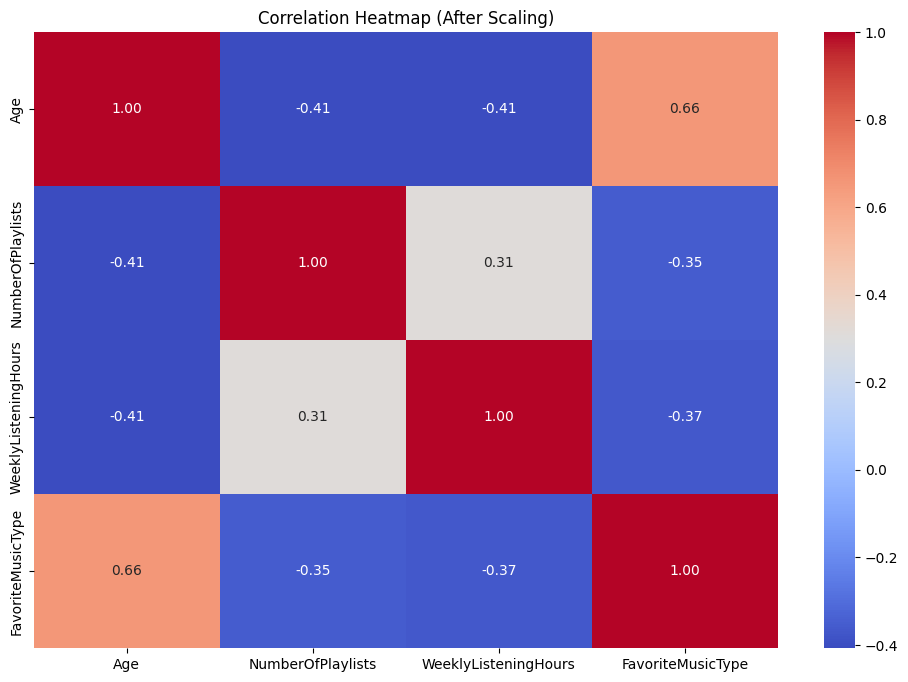

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After Scaling)")
plt.show()


## K-means

### Elbow Method

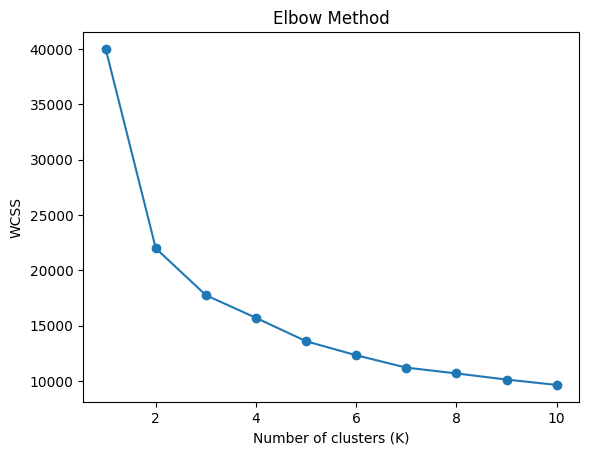

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score Interpretation

In [24]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f'Silhouette Score for k={k}: {score:.9f}')


Silhouette Score for k=2: 0.398285429
Silhouette Score for k=3: 0.311800543
Silhouette Score for k=4: 0.259152291
Silhouette Score for k=5: 0.252724706
Silhouette Score for k=6: 0.237753817
Silhouette Score for k=7: 0.233778054
Silhouette Score for k=8: 0.225345036
Silhouette Score for k=9: 0.210447345
Silhouette Score for k=10: 0.209578139


In [25]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(scaled_df, kmeans.labels_)

np.float64(1.3202523225744225)

In [26]:
from sklearn.cluster import KMeans

# Define and fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(scaled_df)

# Assign the cluster labels to your dataframe
df['Cluster'] = kmeans.labels_

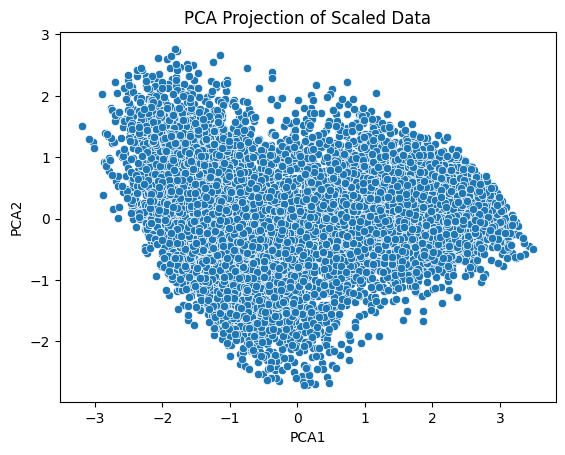

In [27]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Projection of Scaled Data')
plt.show()

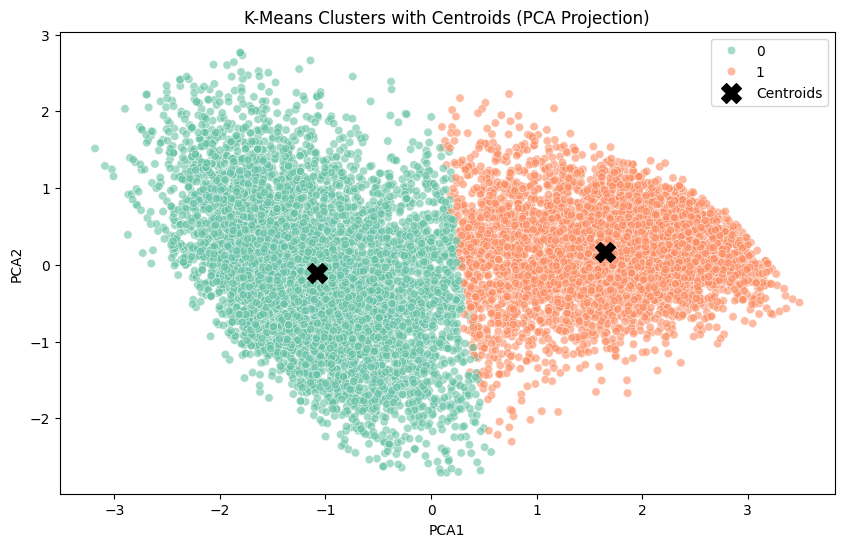

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# PCA on scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


# Transform K-Means centroids to PCA space
centroids = kmeans.cluster_centers_          # in original feature space
centroids_pca = pca.transform(centroids)     # transform to PCA space

# Plot with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clusters with Centroids (PCA Projection)')
plt.legend()
plt.show()



In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

features_kmean = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']

df.groupby('Cluster')[features_kmean].mean()


,Age,WeeklyListeningHours,NumberOfPlaylists,FavoriteMusicType
Cluster,,,,
0,23.310728,20.455480,48.275245,3.086387
1,37.389015,13.249685,25.471655,7.493323


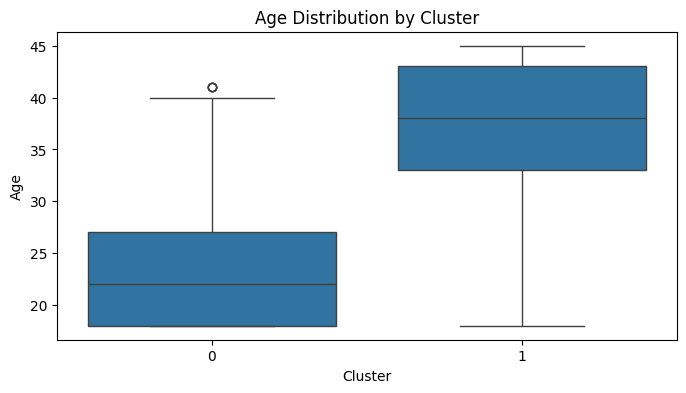

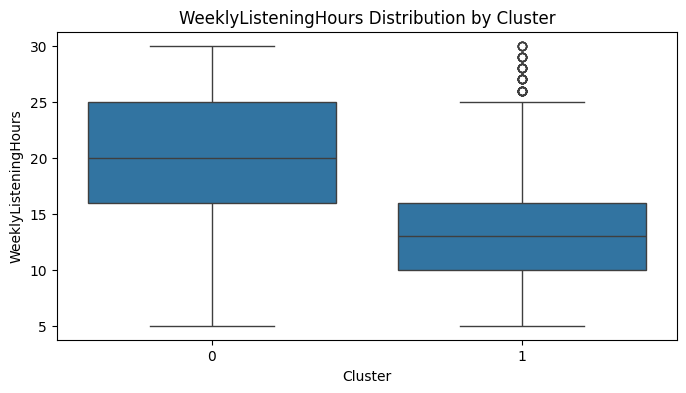

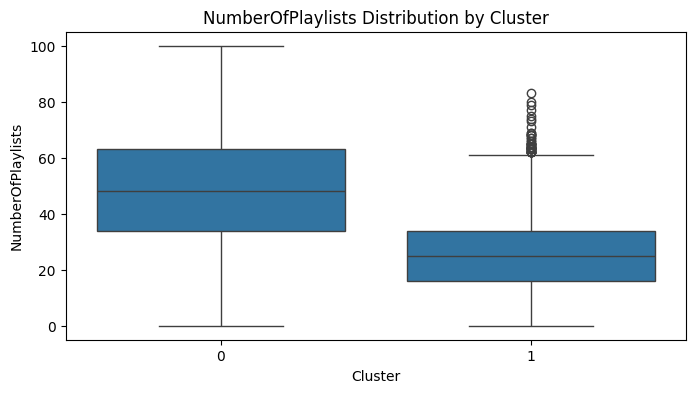

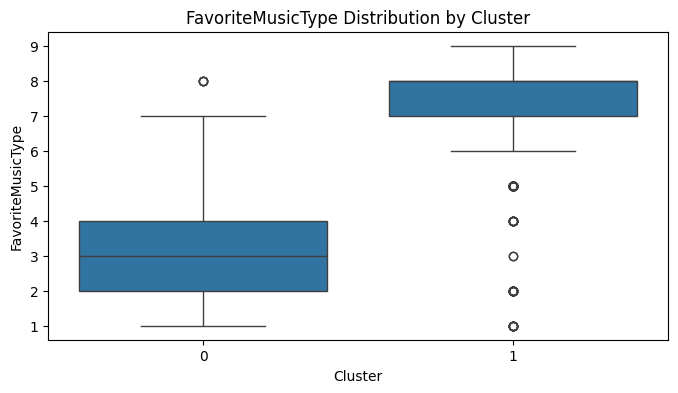

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists','FavoriteMusicType']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()



### Silhouette Score

Silhouette Scores (KMeans):
Clusters = 2, Score = 0.3983
Clusters = 3, Score = 0.3118
Clusters = 4, Score = 0.2592
Clusters = 5, Score = 0.2527
Clusters = 6, Score = 0.2378
Clusters = 7, Score = 0.2338
Clusters = 8, Score = 0.2253
Clusters = 9, Score = 0.2104


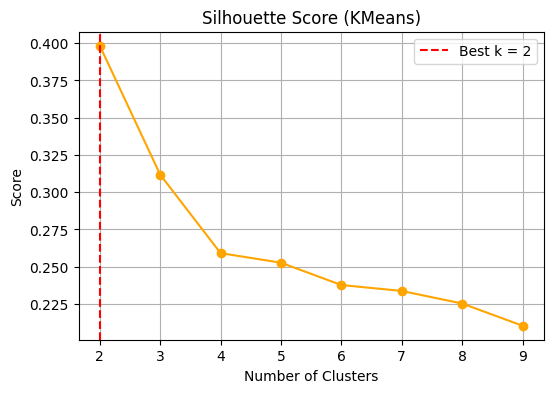

In [31]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 10)
silhouette_scores = []

print("Silhouette Scores (KMeans):")
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)
    print(f"Clusters = {k}, Score = {score:.4f}")

best_k = cluster_range[np.argmax(silhouette_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('Silhouette Score (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_2 = kmeans_2.fit_predict(scaled_df)

SC_score = silhouette_score(scaled_df, labels_2)
print(f"Silhouette Score for KMean: {SC_score:.4f}")

Silhouette Score for KMean: 0.3983


### Calinski-Harabasz Index

Calinski-Harabasz Scores (KMeans):
Clusters = 2, Score = 8199.0737
Clusters = 3, Score = 6269.4831
Clusters = 4, Score = 5160.4024
Clusters = 5, Score = 4861.7010
Clusters = 6, Score = 4492.7710
Clusters = 7, Score = 4284.6811
Clusters = 8, Score = 3922.6212
Clusters = 9, Score = 3688.8481


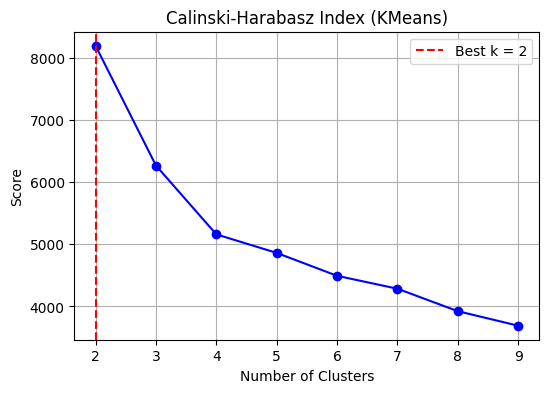

In [33]:
from sklearn.metrics import calinski_harabasz_score

cluster_range = range(2, 10)
calinski_scores = []

print("Calinski-Harabasz Scores (KMeans):")
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_df)
    score = calinski_harabasz_score(scaled_df, labels)
    calinski_scores.append(score)
    print(f"Clusters = {k}, Score = {score:.4f}")

best_k = cluster_range[np.argmax(calinski_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, calinski_scores, marker='o', color='blue')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('Calinski-Harabasz Index (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import calinski_harabasz_score
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_2 = kmeans_2.fit_predict(scaled_df)

CH_score = calinski_harabasz_score(scaled_df, labels_2)
print(f"Calinski Harabasz Score for KMean: {CH_score:.4f}")


Calinski Harabasz Score for KMean: 8199.0737


### Davies-Bouldin Index

Davies-Bouldin Index (KMeans):
Clusters = 2, Score = 0.9932
Clusters = 3, Score = 1.3613
Clusters = 4, Score = 1.3967
Clusters = 5, Score = 1.3188
Clusters = 6, Score = 1.3121
Clusters = 7, Score = 1.2763
Clusters = 8, Score = 1.2892
Clusters = 9, Score = 1.3695


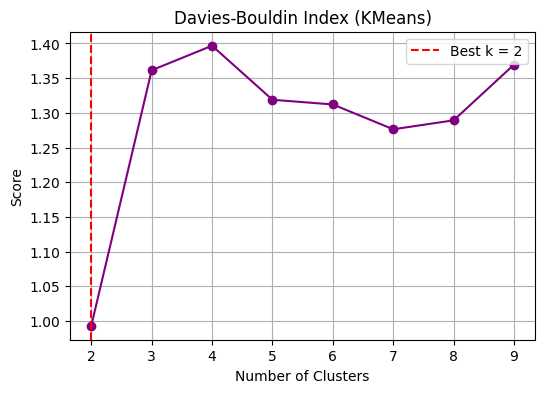

In [35]:
from sklearn.metrics import davies_bouldin_score

cluster_range = range(2, 10)
db_scores = []

print("Davies-Bouldin Index (KMeans):")
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_df)
    score = davies_bouldin_score(scaled_df, labels)
    db_scores.append(score)
    print(f"Clusters = {k}, Score = {score:.4f}")

best_k = cluster_range[np.argmin(db_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, db_scores, marker='o', color='purple')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title('Davies-Bouldin Index (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import davies_bouldin_score
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels_2 = kmeans_2.fit_predict(scaled_df)

dbi_score = davies_bouldin_score(scaled_df, labels_2)
print(f"Davie Bouldin Score for KMean: {dbi_score:.4f}")

Davie Bouldin Score for KMean: 0.9932


In [37]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True).T
mode_music_type = df.groupby('Cluster')['FavoriteMusicType'].agg(lambda x: x.mode()[0])

music_type_map = {
    1: 'Rock',
    2: 'Pop',
    3: 'J-Pop',
    4: 'K-Pop',
    5: 'EDM',
    6: 'Jazz',
    7: 'Chill',
    8: 'Oldies',
    9: 'Traditional'
}


for cluster in cluster_summary.columns:
    print(f"\nCluster {cluster}:")
    print(f"- Average Age: {cluster_summary.loc['Age', cluster]:.1f}")
    print(f"- Weekly Listening Hours: {cluster_summary.loc['WeeklyListeningHours', cluster]:.1f}")
    print(f"- Average Playlists: {cluster_summary.loc['NumberOfPlaylists', cluster]:.1f}")
    print(f"- Most Common Favorite Music Type: {music_type_map[mode_music_type[cluster]]}")



Cluster 0:
- Average Age: 23.3
- Weekly Listening Hours: 20.5
- Average Playlists: 48.3
- Most Common Favorite Music Type: Rock

Cluster 1:
- Average Age: 37.4
- Weekly Listening Hours: 13.2
- Average Playlists: 25.5
- Most Common Favorite Music Type: Oldies


## MeanShift

In [38]:
## import
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:

#Parameter Sensitivity Analysis
quantiles = [0.1, 0.2, 0.3, 0.4]
for q in quantiles:
    bandwidth = estimate_bandwidth(scaled_df, quantile=q, n_samples=5000)
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(scaled_df)
    labels = meanshift.labels_
    n_clusters = len(set(labels))
    
    print(f"Quantile: {q} | Clusters: {n_clusters}", end='')

    if n_clusters > 1:
        score = silhouette_score(scaled_df, labels)
        print(f" | Silhouette Score: {score:.4f}")
    else:
        print(" | Silhouette Score: Not applicable (only one cluster)")

Quantile: 0.1 | Clusters: 2 | Silhouette Score: 0.3987
Quantile: 0.2 | Clusters: 2 | Silhouette Score: 0.3983
Quantile: 0.3 | Clusters: 2 | Silhouette Score: 0.3985
Quantile: 0.4 | Clusters: 1 | Silhouette Score: Not applicable (only one cluster)


In [40]:
# Step 1: Estimate bandwidth
bandwidth = estimate_bandwidth(scaled_df, quantile=0.1, n_samples=5000)
print(f"Estimated Bandwidth: {bandwidth:.4f}")

# Step 2: Apply MeanShift
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(scaled_df)

# Step 3: Get labels
labels_ms = meanshift.labels_
cluster_centers = meanshift.cluster_centers_
n_clusters_ = len(set(labels_ms))

# Step 3.5: Reverse labels if there are exactly 2 clusters
if n_clusters_ == 2:
    labels_ms = np.where(labels_ms == 0, 1, 0)

print(f"Number of estimated clusters: {n_clusters_}")

# Step 4: Evaluate clustering performance
silhouette_avg = silhouette_score(scaled_df, labels_ms)
print(f"Silhouette Score for MeanShift: {silhouette_avg}")

Estimated Bandwidth: 1.3311
Number of estimated clusters: 2
Silhouette Score for MeanShift: 0.398660437698734


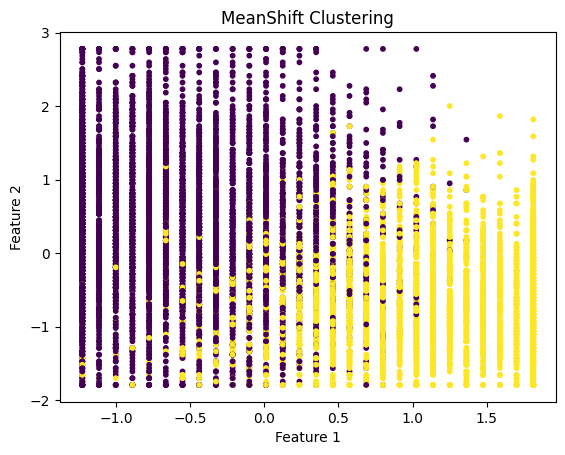

In [41]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels_ms, cmap='viridis', s=10)
plt.title("MeanShift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

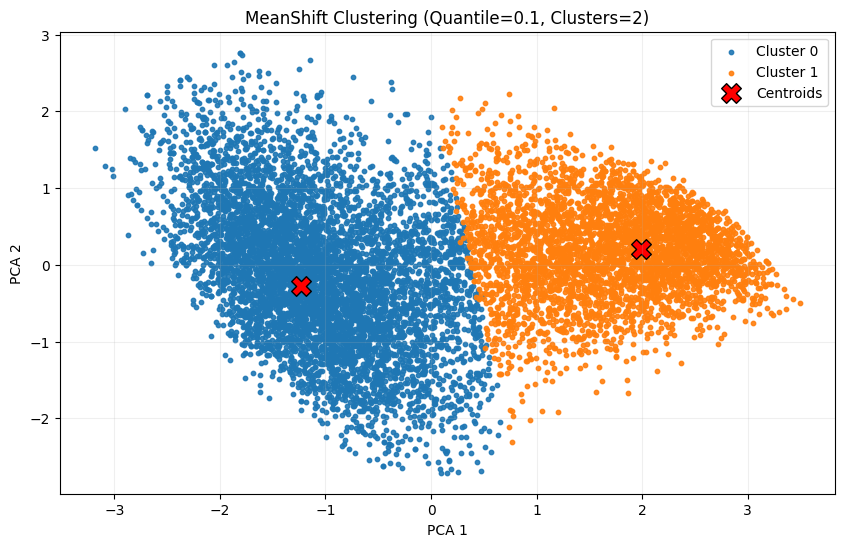

In [42]:
# Visualize Clusters (PCA 2D Projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

plt.figure(figsize=(10, 6))

# Plot each cluster separately for labeling
unique_labels = np.unique(labels_ms)
for cluster_id in unique_labels:
    cluster_points = X_pca[labels_ms == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
            s=10, alpha=0.9, label=f'Cluster {cluster_id}')
plt.title(f"MeanShift Clustering (Quantile=0.1, Clusters={n_clusters_})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plot centroids
if n_clusters > 0:
    centroids_pca = pca.transform(meanshift.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids',edgecolor='black')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

### Silhouette Score

Silhouette Scores for Different Bandwidths:
Bandwidth = 0.50, Clusters = 274, Silhouette Score = 0.1407
Bandwidth = 0.67, Clusters = 26, Silhouette Score = 0.1333
Bandwidth = 0.83, Clusters = 3, Silhouette Score = 0.3020
Bandwidth = 1.00, Clusters = 2, Silhouette Score = 0.3979
Bandwidth = 1.17, Clusters = 2, Silhouette Score = 0.3984
Bandwidth = 1.33, Clusters = 2, Silhouette Score = 0.3987
Bandwidth = 1.50, Clusters = 2, Silhouette Score = 0.3984
Bandwidth = 1.67, Clusters = 2, Silhouette Score = 0.3983
Bandwidth = 1.83, Clusters = 2, Silhouette Score = 0.3983
Bandwidth = 2.00, Clusters = 2, Silhouette Score = 0.3985


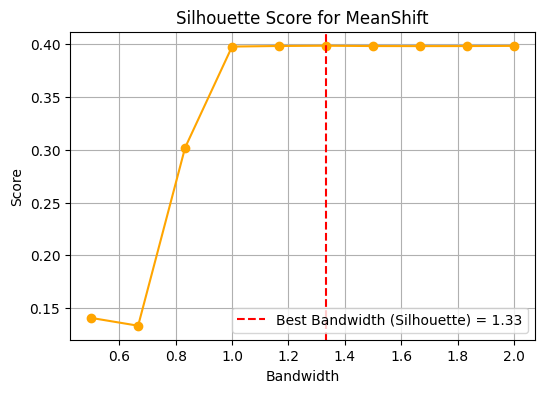

In [43]:
from sklearn.metrics import silhouette_score

# Range of bandwidth values
bandwidth_range = np.linspace(0.5, 2.0, 10)
silhouette_scores = []

print("Silhouette Scores for Different Bandwidths:")

# Iterate through different bandwidth values
for bandwidth in bandwidth_range:
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(scaled_df)
    labels = meanshift.labels_
    
    # Check if there are at least 2 clusters, otherwise skip the iteration
    n_clusters = len(np.unique(labels))
    print(f"Bandwidth = {bandwidth:.2f}, Clusters = {n_clusters}", end='')

    if n_clusters > 1:
        score = silhouette_score(scaled_df, labels)
        silhouette_scores.append(score)
        print(f", Silhouette Score = {score:.4f}")
    else:
        silhouette_scores.append(0)
        print(", No valid clusters found.")

# Identify the best bandwidth based on the Silhouette score (higher is better)
best_bandwidth_silhouette = bandwidth_range[np.argmax(silhouette_scores)]

# Plot the Silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(bandwidth_range, silhouette_scores, marker='o', color='orange')
plt.axvline(x=best_bandwidth_silhouette, color='r', linestyle='--', label=f'Best Bandwidth (Silhouette) = {best_bandwidth_silhouette:.2f}')
plt.title('Silhouette Score for MeanShift')
plt.xlabel('Bandwidth')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

# Estimate bandwidth using quantile=0.1
bandwidth = estimate_bandwidth(scaled_df, quantile=0.1, n_samples=5000)

# Fit MeanShift with estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(scaled_df)
labels_ms2 = mean_shift.labels_

SC_score = silhouette_score(scaled_df, labels_ms2)
print(f"Silhouette Score for MeanShift: {SC_score:.4f}")

Silhouette Score for MeanShift: 0.3987


### Calinski-Harabasz Score

Calinski-Harabasz Scores for Different Bandwidths:
Bandwidth = 0.50, Calinski-Harabasz = 589.5688
Bandwidth = 0.67, Calinski-Harabasz = 1444.8161
Bandwidth = 0.83, Calinski-Harabasz = 5913.7295
Bandwidth = 1.00, Calinski-Harabasz = 8117.1595
Bandwidth = 1.17, Calinski-Harabasz = 8154.8618
Bandwidth = 1.33, Calinski-Harabasz = 8175.9096
Bandwidth = 1.50, Calinski-Harabasz = 8192.7289
Bandwidth = 1.67, Calinski-Harabasz = 8194.0114
Bandwidth = 1.83, Calinski-Harabasz = 8195.4782
Bandwidth = 2.00, Calinski-Harabasz = 8193.3011


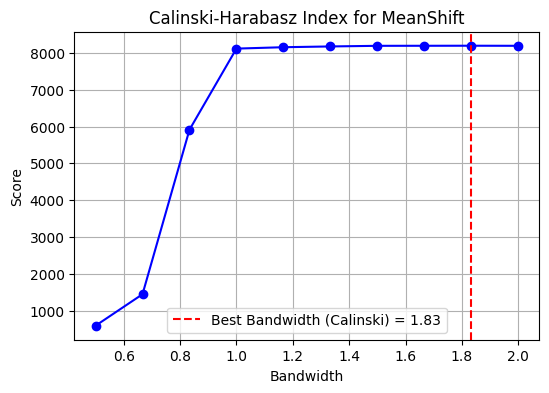

In [45]:
from sklearn.metrics import calinski_harabasz_score

# Range of bandwidth values
bandwidth_range = np.linspace(0.5, 2.0, 10)
calinski_scores = []

print("Calinski-Harabasz Scores for Different Bandwidths:")

# Iterate through different bandwidth values
for bandwidth in bandwidth_range:
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(scaled_df)
    labels = meanshift.labels_
    
    # Check if there are at least 2 clusters, otherwise skip the iteration
    if len(np.unique(labels)) > 1:
        # Calinski-Harabasz Score
        calinski_score = calinski_harabasz_score(scaled_df, labels)
        calinski_scores.append(calinski_score)
        print(f"Bandwidth = {bandwidth:.2f}, Calinski-Harabasz = {calinski_score:.4f}")
    else:
        print(f"Bandwidth = {bandwidth:.2f}, No valid clusters found.")
        calinski_scores.append(0)  # Append 0 or np.nan to preserve alignment with bandwidth_range

# Identify the best bandwidth based on the Calinski-Harabasz score (higher is better)
best_bandwidth_calinski = bandwidth_range[np.argmax(calinski_scores)]

# Plot the Calinski-Harabasz scores
plt.figure(figsize=(6, 4))
plt.plot(bandwidth_range, calinski_scores, marker='o', color='blue')
plt.axvline(x=best_bandwidth_calinski, color='r', linestyle='--', label=f'Best Bandwidth (Calinski) = {best_bandwidth_calinski:.2f}')
plt.title('Calinski-Harabasz Index for MeanShift')
plt.xlabel('Bandwidth')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import calinski_harabasz_score

# Estimate bandwidth using quantile=0.1
bandwidth = estimate_bandwidth(scaled_df, quantile=0.1, n_samples=5000)

# Fit MeanShift with estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(scaled_df)
labels_ms2 = mean_shift.labels_

CH_score = calinski_harabasz_score(scaled_df, labels_ms2)
print(f"Calinski Harabasz Score for MeanShift: {CH_score:.4f}")

Calinski Harabasz Score for MeanShift: 8175.5443


### Davies-Bouldin Index

Davies-Bouldin Scores for Different Bandwidths:
Bandwidth = 0.50, Clusters = 274, Davies-Bouldin Score = 1.2037
Bandwidth = 0.67, Clusters = 26, Davies-Bouldin Score = 1.3923
Bandwidth = 0.83, Clusters = 3, Davies-Bouldin Score = 1.3784
Bandwidth = 1.00, Clusters = 2, Davies-Bouldin Score = 0.9733
Bandwidth = 1.17, Clusters = 2, Davies-Bouldin Score = 0.9768
Bandwidth = 1.33, Clusters = 2, Davies-Bouldin Score = 0.9819
Bandwidth = 1.50, Clusters = 2, Davies-Bouldin Score = 0.9897
Bandwidth = 1.67, Clusters = 2, Davies-Bouldin Score = 0.9908
Bandwidth = 1.83, Clusters = 2, Davies-Bouldin Score = 0.9911
Bandwidth = 2.00, Clusters = 2, Davies-Bouldin Score = 0.9882


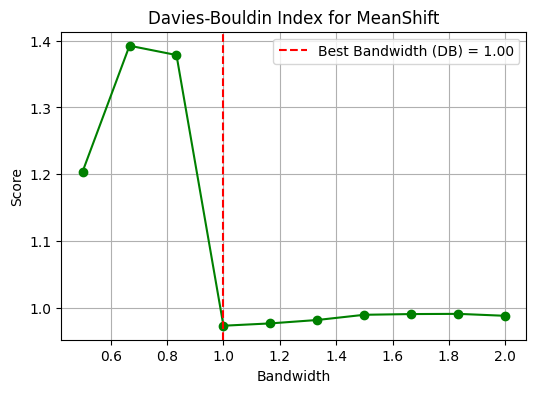

In [47]:
from sklearn.metrics import davies_bouldin_score

# Range of bandwidth values
bandwidth_range = np.linspace(0.5, 2.0, 10)
davies_bouldin_scores = []

print("Davies-Bouldin Scores for Different Bandwidths:")

# Iterate through different bandwidth values
for bandwidth in bandwidth_range:
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(scaled_df)
    labels = meanshift.labels_
    
    # Check if there are at least 2 clusters, otherwise skip the iteration
    n_clusters = len(np.unique(labels))
    print(f"Bandwidth = {bandwidth:.2f}, Clusters = {n_clusters}", end='')

    if n_clusters > 1:
        db_score = davies_bouldin_score(scaled_df, labels)
        davies_bouldin_scores.append(db_score)
        print(f", Davies-Bouldin Score = {db_score:.4f}")
    else:
        davies_bouldin_scores.append(np.inf)
        print(", No valid clusters found.")

# Identify the best bandwidth based on the Davies-Bouldin score (lower is better)
best_bandwidth_db = bandwidth_range[np.argmin(davies_bouldin_scores)]

# Plot the Davies-Bouldin scores
plt.figure(figsize=(6, 4))
plt.plot(bandwidth_range, davies_bouldin_scores, marker='o', color='green')
plt.axvline(x=best_bandwidth_db, color='r', linestyle='--', label=f'Best Bandwidth (DB) = {best_bandwidth_db:.2f}')
plt.title('Davies-Bouldin Index for MeanShift')
plt.xlabel('Bandwidth')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import davies_bouldin_score

# Estimate bandwidth using quantile=0.1
bandwidth = estimate_bandwidth(scaled_df, quantile=0.1, n_samples=5000)

# Fit MeanShift with estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(scaled_df)
labels_ms2 = mean_shift.labels_

dbi_score = davies_bouldin_score(scaled_df, labels_ms2)
print(f"Davies Boldin Score for MeanShift: {dbi_score:.4f}")

Davies Boldin Score for MeanShift: 0.9818


In [49]:
# Execution Time Measurement, performance compare with other clustering method
import time

start = time.time()
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(scaled_df)
end = time.time()
print(f"MeanShift execution time: {end - start:.2f} seconds")

MeanShift execution time: 2.67 seconds


In [50]:
# Add cluster label to original dataframe
df["MeanShift_Cluster"] = labels_ms

feature_columns = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']

# Display summary statistics per cluster
cluster_summary = df.groupby("MeanShift_Cluster")[feature_columns].mean()
cluster_summary

,Age,WeeklyListeningHours,NumberOfPlaylists,FavoriteMusicType
MeanShift_Cluster,,,,
0,23.363725,20.332414,47.831765,3.141629
1,37.791971,13.197602,25.393639,7.557351


In [51]:
# Map favorite music type codes to labels
music_labels = {
    1: 'Rock', 2: 'Pop', 3: 'J-Pop', 4: 'K-Pop', 5: 'EDM',
    6: 'Jazz', 7: 'Chill', 8: 'Oldies', 9: 'Traditional'
}

# Add cluster labels to the original DataFrame
df['Cluster'] = labels_ms

# Summary statistics
summary = df.groupby('Cluster')[['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']].mean().round(1)
fav_music = df.groupby('Cluster')['FavoriteMusicType'].agg(lambda x: x.mode().iloc[0])
cluster_counts = df['Cluster'].value_counts()


# Print cluster summaries
for cluster_id, row in summary.iterrows():
    music_code = fav_music[cluster_id]
    music_label = music_labels.get(music_code, 'Unknown')

    print(f"Cluster {cluster_id}:")
    print(f"- Users in Cluster: {cluster_counts[cluster_id]}")
    print(f"- Average Age: {row['Age']}")
    print(f"- Weekly Listening Hours: {row['WeeklyListeningHours']}")
    print(f"- Average Playlists: {row['NumberOfPlaylists']}")
    print(f"- Most Common Favorite Music Type: {music_label}")
    print()

Cluster 0:
- Users in Cluster: 6164
- Average Age: 23.4
- Weekly Listening Hours: 20.3
- Average Playlists: 47.8
- Most Common Favorite Music Type: Rock

Cluster 1:
- Users in Cluster: 3836
- Average Age: 37.8
- Weekly Listening Hours: 13.2
- Average Playlists: 25.4
- Most Common Favorite Music Type: Oldies



## Agglomerative Hierarchical Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

for k in range(2, 6):
    clustering = AgglomerativeClustering(n_clusters=k)
    labels = clustering.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.37211992951376033
Silhouette Score for k=3: 0.2686725367017062
Silhouette Score for k=4: 0.22095184737920504
Silhouette Score for k=5: 0.2168789224722383


In [53]:
agg = AgglomerativeClustering(n_clusters=2)
df['Agglomerative_Cluster'] = agg.fit_predict(scaled_df)

labels = df['Agglomerative_Cluster']
score = silhouette_score(scaled_df, labels)
print(f'Cluster = {agg.n_clusters}, Silhouette Score (Agglomerative): {score:.4f}')



Cluster = 2, Silhouette Score (Agglomerative): 0.3721


In [54]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
df['Agglomerative_Cluster'] = agg.fit_predict(scaled_df)


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


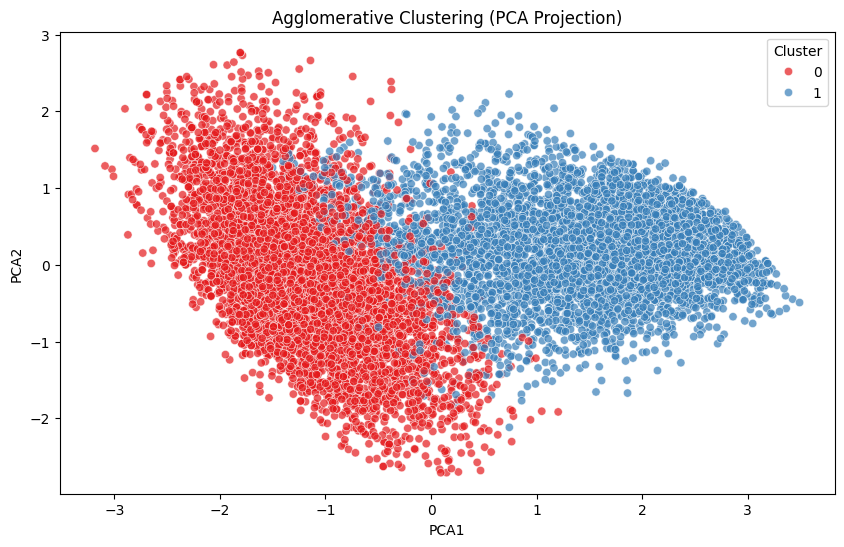

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Agglomerative_Cluster', palette='Set1', alpha=0.7)
plt.title('Agglomerative Clustering (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


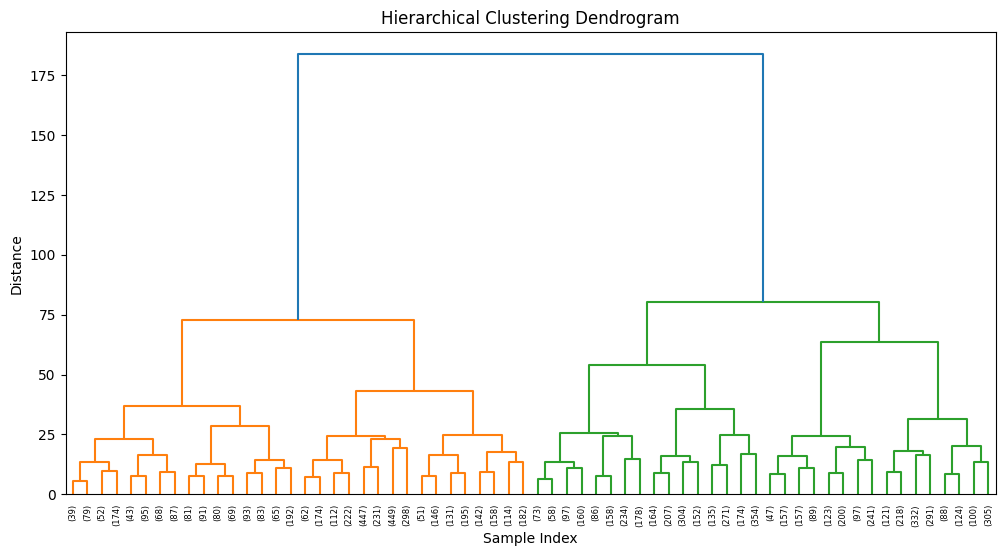

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Dendrogram
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


### Silhouette Score

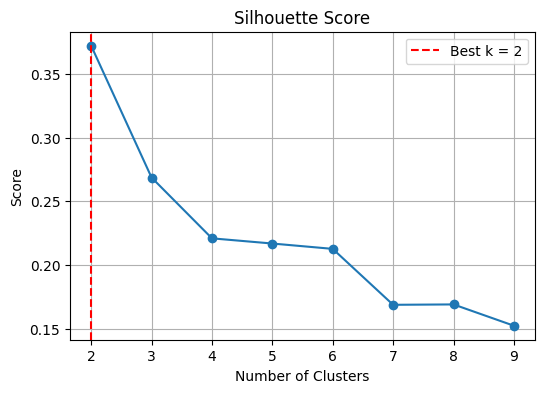

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

cluster_range = range(2, 10)
silhouette_scores = []

for k in cluster_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

best_k_silhouette = cluster_range[np.argmax(silhouette_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.axvline(x=best_k_silhouette, color='r', linestyle='--', label=f'Best k = {best_k_silhouette}')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


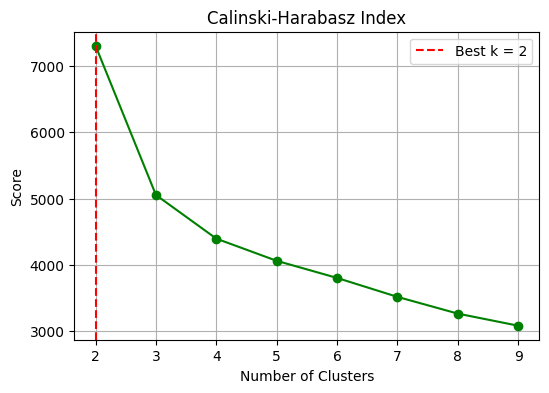

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

cluster_range = range(2, 10)
calinski_scores = []

for k in cluster_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(scaled_df)
    calinski_scores.append(calinski_harabasz_score(scaled_df, labels))

best_k_calinski = cluster_range[np.argmax(calinski_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, calinski_scores, marker='o', color='green')
plt.axvline(x=best_k_calinski, color='r', linestyle='--', label=f'Best k = {best_k_calinski}')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


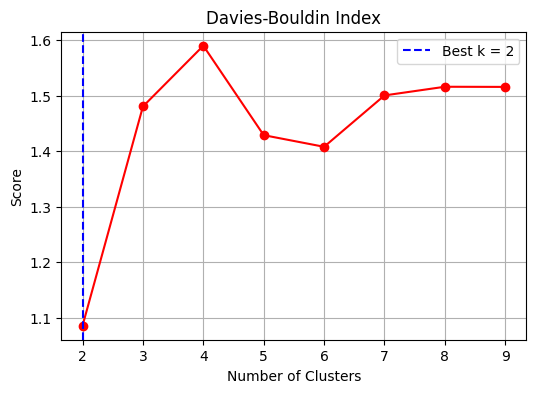

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

cluster_range = range(2, 10)
davies_scores = []

for k in cluster_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(scaled_df)
    davies_scores.append(davies_bouldin_score(scaled_df, labels))

best_k_davies = cluster_range[np.argmin(davies_scores)]

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, davies_scores, marker='o', color='red')
plt.axvline(x=best_k_davies, color='blue', linestyle='--', label=f'Best k = {best_k_davies}')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


In [61]:
# Summary output
clusters = df['Agglomerative_Cluster'].unique()

music_type_map = {
    1: 'Rock',
    2: 'Pop',
    3: 'J-Pop',
    4: 'K-Pop',
    5: 'EDM',
    6: 'Jazz',
    7: 'Chill',
    8: 'Oldies',
    9: 'Traditional'
}

for cluster in sorted(clusters):
    cluster_data = df[df['Agglomerative_Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_hours = cluster_data['WeeklyListeningHours'].mean()
    avg_playlists = cluster_data['NumberOfPlaylists'].mean()
    
    # Most common favorite music type (numeric)
    top_music_code = cluster_data['FavoriteMusicType'].mode()[0]
    top_music = music_type_map.get(top_music_code, "Unknown")

    print(f"Cluster {cluster}:")
    print(f"- Average Age: {avg_age:.1f}")
    print(f"- Weekly Listening Hours: {avg_hours:.1f}")
    print(f"- Average Playlists: {avg_playlists:.1f}")
    print(f"- Most Common Favorite Music Type: {top_music}\n")


Cluster 0:
- Average Age: 23.2
- Weekly Listening Hours: 20.4
- Average Playlists: 48.6
- Most Common Favorite Music Type: Rock

Cluster 1:
- Average Age: 35.9
- Weekly Listening Hours: 14.2
- Average Playlists: 27.8
- Most Common Favorite Music Type: Oldies



## Comparison

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


# Define function to compute all three scores
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) < 2:
        return (0, 0, np.inf)  # Invalid clustering
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    return (silhouette, calinski, davies)

# ----------- KMEANS -----------
best_score_kmeans = {'k': None, 'silhouette': 0, 'calinski': 0, 'davies': np.inf}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_df)
    s, c, d = evaluate_clustering(scaled_df, labels)
    if s > best_score_kmeans['silhouette']:
        best_score_kmeans = {'k': k, 'silhouette': s, 'calinski': c, 'davies': d}

# ----------- MEANSHIFT -----------
bandwidth_range = np.linspace(0.5, 2.0, 10)
best_score_meanshift = {'bandwidth': None, 'silhouette': 0, 'calinski': 0, 'davies': np.inf}
for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(scaled_df)
    labels = ms.labels_
    s, c, d = evaluate_clustering(scaled_df, labels)
    if s > best_score_meanshift['silhouette']:
        best_score_meanshift = {'bandwidth': bandwidth, 'silhouette': s, 'calinski': c, 'davies': d}

# ----------- AGGLOMERATIVE -----------
best_score_agg = {'k': None, 'silhouette': 0, 'calinski': 0, 'davies': np.inf}
for k in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(scaled_df)
    s, c, d = evaluate_clustering(scaled_df, labels)
    if s > best_score_agg['silhouette']:
        best_score_agg = {'k': k, 'silhouette': s, 'calinski': c, 'davies': d}

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Algorithm': ['KMeans', 'MeanShift', 'Agglomerative'],
    'Best k / Bandwidth': [
        f'k={best_score_kmeans["k"]}',
        f'bandwidth={best_score_meanshift["bandwidth"]:.2f}',
        f'k={best_score_agg["k"]}'
    ],
    'Silhouette Score': [
        best_score_kmeans['silhouette'],
        best_score_meanshift['silhouette'],
        best_score_agg['silhouette']
    ],
    'Calinski-Harabasz Index': [
        best_score_kmeans['calinski'],
        best_score_meanshift['calinski'],
        best_score_agg['calinski']
    ],
    'Davies-Bouldin Index': [
        best_score_kmeans['davies'],
        best_score_meanshift['davies'],
        best_score_agg['davies']
    ]
})

# Round for presentation
results_df = results_df.round({
    'Silhouette Score': 4,
    'Calinski-Harabasz Index': 2,
    'Davies-Bouldin Index': 4
})

# Print the DataFrame
print("\n--- BEST CLUSTERING RESULTS COMPARISON ---")
results_df



--- BEST CLUSTERING RESULTS COMPARISON ---


,Algorithm,Best k / Bandwidth,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,k=2,0.3983,8199.07,0.9932
1,MeanShift,bandwidth=1.33,0.3987,8175.91,0.9819
2,Agglomerative,k=2,0.3721,7305.57,1.0853



--- BEST CLUSTERING RESULTS COMPARISON ---
    Algorithm Best k / Bandwidth  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
       KMeans                k=2            0.3983                  8199.07                0.9932
    MeanShift     bandwidth=1.33            0.3987                  8175.91                0.9819
Agglomerative                k=2            0.3721                  7305.57                1.0853


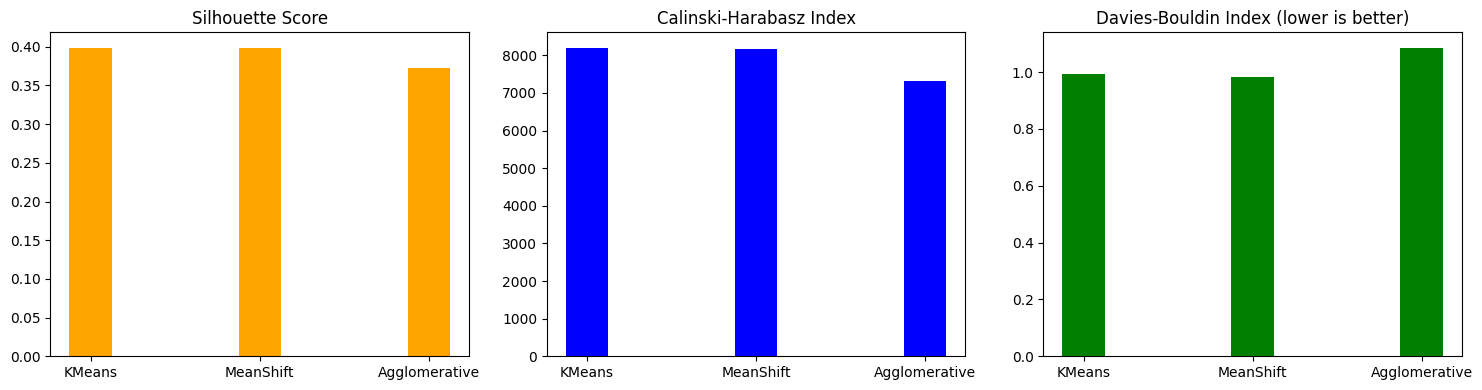

In [ ]:
#Plot for visual comparison
labels = ['KMeans', 'MeanShift', 'Agglomerative']
sil_scores = [best_score_kmeans['silhouette'], best_score_meanshift['silhouette'], best_score_agg['silhouette']]
cal_scores = [best_score_kmeans['calinski'], best_score_meanshift['calinski'], best_score_agg['calinski']]
db_scores = [best_score_kmeans['davies'], best_score_meanshift['davies'], best_score_agg['davies']]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Silhouette
ax[0].bar(x, sil_scores, color='orange', width=width)
ax[0].set_title('Silhouette Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)

# Calinski-Harabasz
ax[1].bar(x, cal_scores, color='blue', width=width)
ax[1].set_title('Calinski-Harabasz Index')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)

# Davies-Bouldin
ax[2].bar(x, db_scores, color='green', width=width)
ax[2].set_title('Davies-Bouldin Index (lower is better)')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Algorithm': ['KMeans', 'MeanShift', 'Agglomerative'],
    'Best k / Bandwidth': [
        f'k={best_score_kmeans["k"]}',
        f'bandwidth={best_score_meanshift["bandwidth"]:.2f}',
        f'k={best_score_agg["k"]}'
    ],
    'Silhouette Score': [
        best_score_kmeans['silhouette'],
        best_score_meanshift['silhouette'],
        best_score_agg['silhouette']
    ],
    'Calinski-Harabasz Index': [
        best_score_kmeans['calinski'],
        best_score_meanshift['calinski'],
        best_score_agg['calinski']
    ],
    'Davies-Bouldin Index': [
        best_score_kmeans['davies'],
        best_score_meanshift['davies'],
        best_score_agg['davies']
    ]
})

# Round for presentation
results_df = results_df.round({
    'Silhouette Score': 4,
    'Calinski-Harabasz Index': 2,
    'Davies-Bouldin Index': 4
})

# Print the DataFrame
print("\n--- BEST CLUSTERING RESULTS COMPARISON ---")
results_df



--- BEST CLUSTERING RESULTS COMPARISON ---


,Algorithm,Best k / Bandwidth,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,k=2,0.3983,8199.07,0.9932
1,MeanShift,bandwidth=1.33,0.3987,8175.91,0.9819
2,Agglomerative,k=2,0.3721,7305.57,1.0853
